In [2]:
print("Columns in dataset:", df.columns.tolist())


Columns in dataset: ['region', 'date', 'frequency', 'estimated_unemployment_rate_(%)', 'estimated_employed', 'estimated_labour_participation_rate_(%)', 'area']


Upload your unemployment dataset CSV...


Saving Unemployment in India.csv to Unemployment in India (1).csv
Saving Unemployment_Rate_upto_11_2020.csv to Unemployment_Rate_upto_11_2020.csv
Dataset shape: (768, 7)
First 5 rows:
           Region         Date  Frequency   Estimated Unemployment Rate (%)  \
0  Andhra Pradesh   31-05-2019    Monthly                              3.65   
1  Andhra Pradesh   30-06-2019    Monthly                              3.05   
2  Andhra Pradesh   31-07-2019    Monthly                              3.75   
3  Andhra Pradesh   31-08-2019    Monthly                              3.32   
4  Andhra Pradesh   30-09-2019    Monthly                              5.17   

    Estimated Employed   Estimated Labour Participation Rate (%)   Area  
0           11999139.0                                     43.24  Rural  
1           11755881.0                                     42.05  Rural  
2           12086707.0                                     43.50  Rural  
3           12285693.0                       

/tmp/ipython-input-4062568230.py:30: UserWarning: Parsing dates in  %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df["date"] = pd.to_datetime(df["date"], errors="coerce")


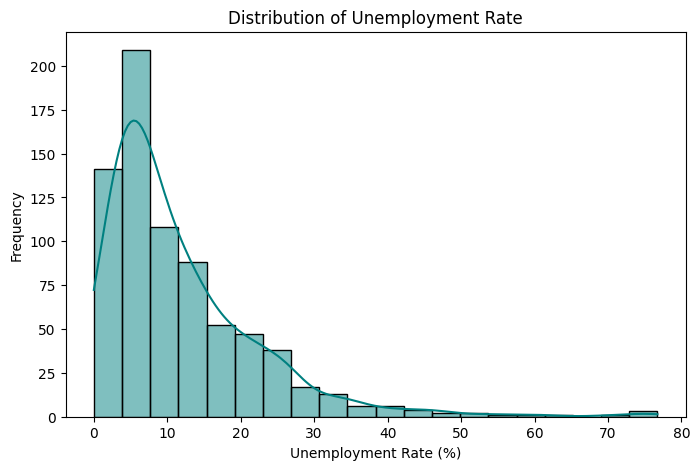

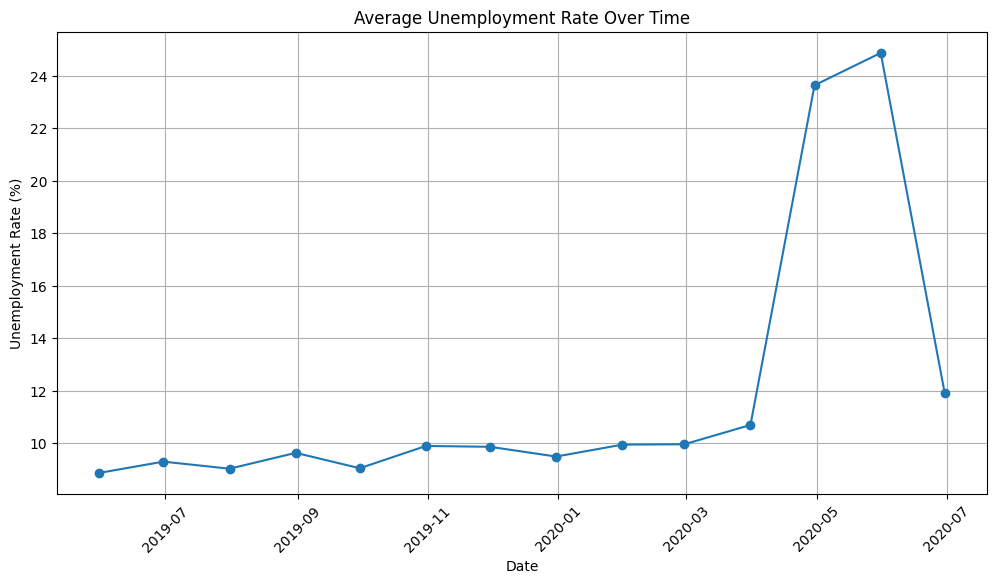

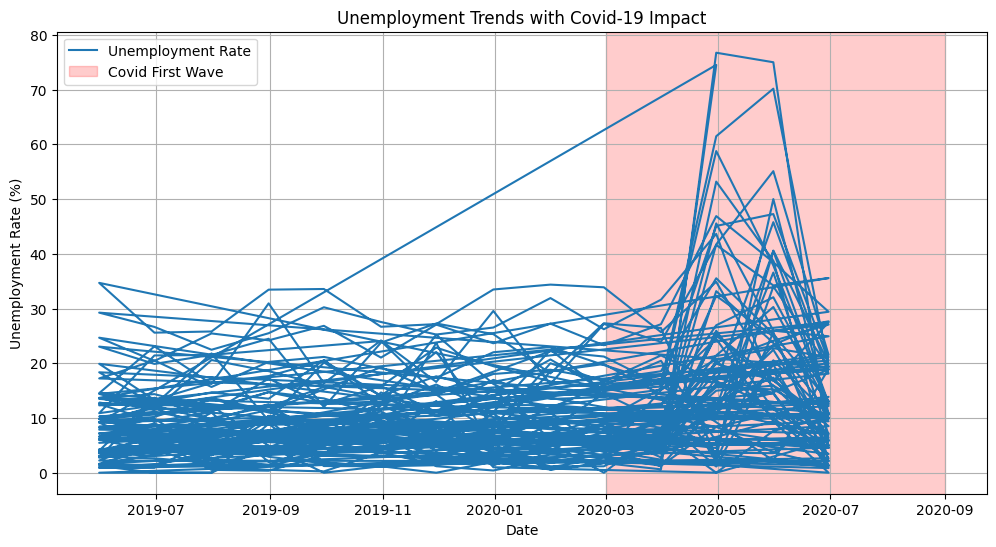

Average unemployment rate before Covid (till Feb 2020): 9.51%
Average unemployment rate during first Covid wave (Mar-Sep 2020): 17.77%


/tmp/ipython-input-4062568230.py:82: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="unemployment_rate", y="region",
/tmp/ipython-input-4062568230.py:82: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="unemployment_rate", y="region",


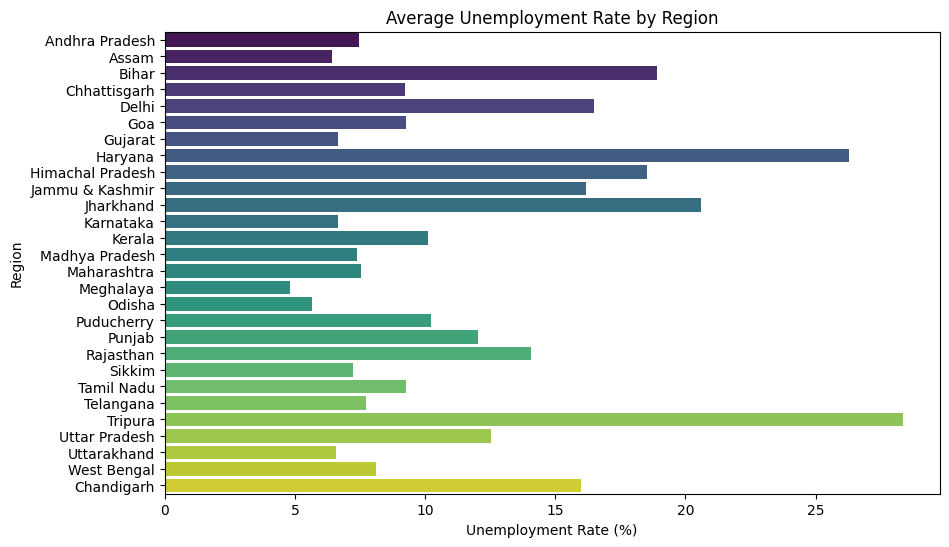

/tmp/ipython-input-4062568230.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="month", y="unemployment_rate", data=df, palette="coolwarm")


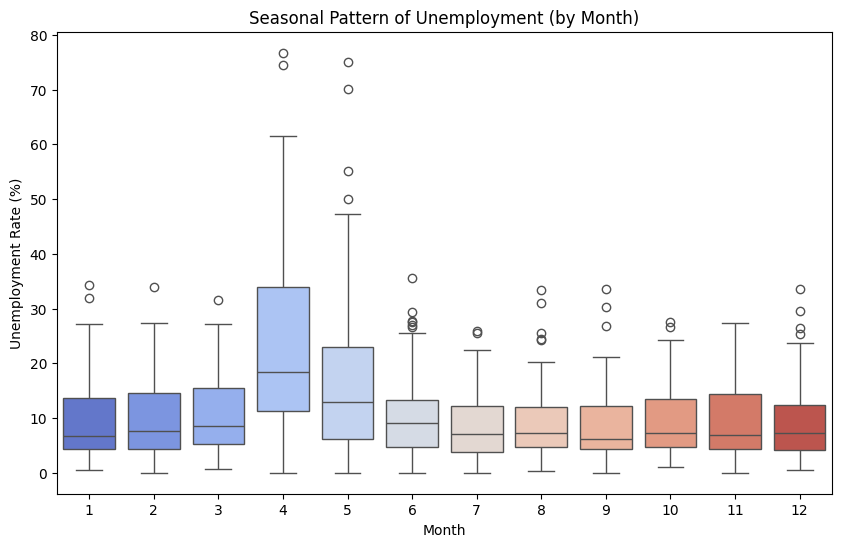


Key Insights:
1. Covid-19 had a significant impact, with unemployment peaking during Mar-Sep 2020.
2. Some regions consistently show higher unemployment than others.
3. Seasonal fluctuations are visible across months.
4. Average unemployment rates increased notably in 2020 compared to pre-Covid periods.
5. Policymakers should focus on vulnerable regions and prepare employment safety nets for shocks like pandemics.



In [3]:
# ================== IMPORTS ==================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files

# ================== FILE UPLOAD ==================
print("Upload your unemployment dataset CSV...")
uploaded = files.upload()

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

print("Dataset shape:", df.shape)
print("First 5 rows:")
print(df.head())

# ================== DATA CLEANING ==================
# Standardize column names
df.columns = df.columns.str.strip().str.replace(" ", "_").str.lower()
print("\nColumns after renaming:", df.columns.tolist())

# Rename unemployment column for easier use
if "estimated_unemployment_rate_(%)" in df.columns:
    df.rename(columns={"estimated_unemployment_rate_(%)": "unemployment_rate"}, inplace=True)

# Convert date column
if "date" in df.columns:
    df["date"] = pd.to_datetime(df["date"], errors="coerce")

# Drop duplicates
df = df.drop_duplicates()

# Handle missing values
print("\nMissing values:\n", df.isnull().sum())
df = df.dropna()

# ================== EXPLORATORY DATA ANALYSIS ==================
plt.figure(figsize=(8,5))
sns.histplot(df["unemployment_rate"], bins=20, kde=True, color="teal")
plt.title("Distribution of Unemployment Rate")
plt.xlabel("Unemployment Rate (%)")
plt.ylabel("Frequency")
plt.show()

# ================== TIME SERIES ANALYSIS ==================
if "date" in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df.groupby("date")["unemployment_rate"].mean(), marker="o")
    plt.title("Average Unemployment Rate Over Time")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.xticks(rotation=45)
    plt.grid(True)
    plt.show()

# ================== COVID-19 IMPACT ==================
if "date" in df.columns:
    plt.figure(figsize=(12,6))
    plt.plot(df["date"], df["unemployment_rate"], label="Unemployment Rate")
    plt.axvspan(pd.to_datetime("2020-03-01"),
                pd.to_datetime("2020-09-01"),
                color="red", alpha=0.2, label="Covid First Wave")
    plt.title("Unemployment Trends with Covid-19 Impact")
    plt.xlabel("Date")
    plt.ylabel("Unemployment Rate (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

    # Compare pre vs during covid
    pre_covid = df[df["date"] < "2020-03-01"]["unemployment_rate"].mean()
    during_covid = df[(df["date"] >= "2020-03-01") & (df["date"] <= "2020-09-01")]["unemployment_rate"].mean()

    print(f"Average unemployment rate before Covid (till Feb 2020): {pre_covid:.2f}%")
    print(f"Average unemployment rate during first Covid wave (Mar-Sep 2020): {during_covid:.2f}%")

# ================== REGION-WISE ANALYSIS ==================
if "region" in df.columns:
    plt.figure(figsize=(10,6))
    sns.barplot(x="unemployment_rate", y="region",
                data=df, ci=None, estimator=np.mean, palette="viridis")
    plt.title("Average Unemployment Rate by Region")
    plt.xlabel("Unemployment Rate (%)")
    plt.ylabel("Region")
    plt.show()

# ================== SEASONALITY / TRENDS ==================
if "date" in df.columns:
    df["month"] = df["date"].dt.month
    df["year"] = df["date"].dt.year

    plt.figure(figsize=(10,6))
    sns.boxplot(x="month", y="unemployment_rate", data=df, palette="coolwarm")
    plt.title("Seasonal Pattern of Unemployment (by Month)")
    plt.xlabel("Month")
    plt.ylabel("Unemployment Rate (%)")
    plt.show()

# ================== INSIGHTS ==================
print("""
Key Insights:
1. Covid-19 had a significant impact, with unemployment peaking during Mar-Sep 2020.
2. Some regions consistently show higher unemployment than others.
3. Seasonal fluctuations are visible across months.
4. Average unemployment rates increased notably in 2020 compared to pre-Covid periods.
5. Policymakers should focus on vulnerable regions and prepare employment safety nets for shocks like pandemics.
""")
